### Read and examine a dataset and classify variables by their type: quantitative vs. categorical

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
df=pd.read_csv('data_set.csv',names=['Gender','Height','Weight','Index'])

In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
Index     10000 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


> Four attributes are there :
> * Gender     object
> * Height     float64
> * Weight     float64
> * Index      int64

> There are two (Height and Weight) are quantitative variables while other two (Gender and Index) are categorical vaiables.
> * Height has numerical value in feets.
> * Weight has numerical value in kg.
> * Gender has categorical value (Male or Female).
> * Index has categorical value (0, 1, 2, 3, 4) for various categories of health status.


### Handle categorical variables with numerically coded values

> Here Gender is categorical variable so, convert into numerical values
> * 1 --> Male
> * 0 --> Female

In [4]:
# dummy of dataset
dummy=df
dummy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
dummy

,Gender,Height,Weight,Index
0,1,6.153918,109.721205,4
1,1,5.731826,73.622879,1
2,1,6.175842,96.497744,2
3,1,5.977582,99.809704,3
4,1,5.823483,93.598806,3
...,...,...,...,...
9995,0,5.514388,62.041283,1
9996,0,5.588930,77.504471,4
9997,0,5.322333,58.275494,2
9998,0,5.752854,74.322315,3


### Perform univariate and bivariate analysis and derive meaningful insights about the dataset

#### Univariate Analysis

> Categorical Variables

> * Gender

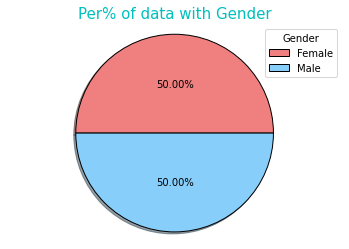

In [5]:
Gen=['Female','Male']
color=['lightcoral','lightskyblue']
plt.pie(dummy.groupby('Gender').count()['Weight'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.5,
        shadow=True,
        wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True}
       )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(Gen,title="Gender",loc='upper right')
plt.title('Per% of data with Gender',color='c',size=15)
plt.show()

> * Index

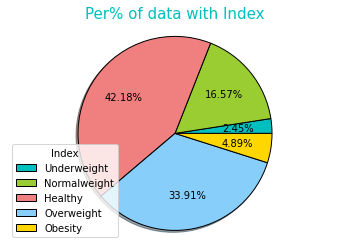

In [6]:
Index=['Underweight', 'Normalweight', 'Healthy', 'Overweight', 'Obesity']
color=['c','yellowgreen','lightcoral','lightskyblue','gold']
plt.pie(dummy.groupby('Index').count()['Weight'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.65,
        shadow=True,
        wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True}
       )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(Index,title="Index",loc='lower left')
plt.title('Per% of data with Index',color='c',size=15)
plt.show()

> Quantitative Variable

> * Height

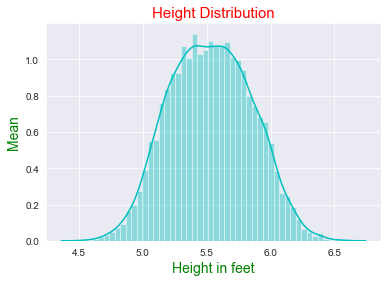

In [7]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Height'],color='c')
plt.title('Height Distribution',color='r',size=15)
plt.xlabel('Height in feet',color='g',size=14)
plt.ylabel('Mean',color='g',size=14)
plt.show()

> * Weight

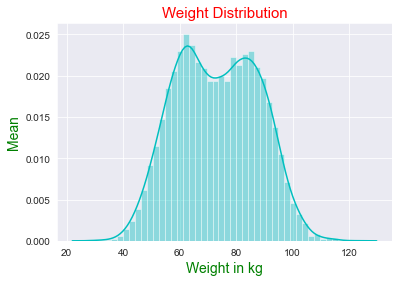

In [8]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Weight'],color='c')
plt.title('Weight Distribution',color='r',size=15)
plt.xlabel('Weight in kg',color='g',size=14)
plt.ylabel('Mean',color='g',size=14)
plt.show()

### Bivariate Analysis 

> * With respect to Gender

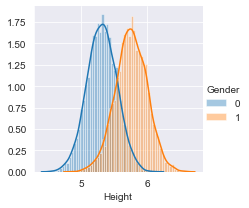

In [9]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Height").add_legend()
plt.show()

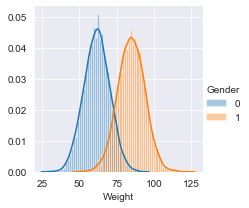

In [10]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Weight").add_legend()
plt.show()

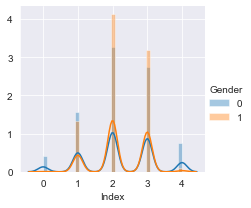

In [11]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Index").add_legend()
plt.show()

> * With respect to Index

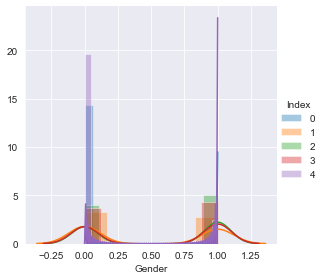

In [12]:
sns.FacetGrid(dummy,hue="Index",height=4).map(sns.distplot,"Gender").add_legend()
plt.show()

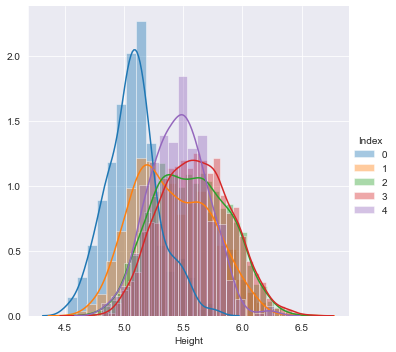

In [13]:
sns.FacetGrid(dummy,hue="Index",height=5).map(sns.distplot,"Height").add_legend()
plt.show()

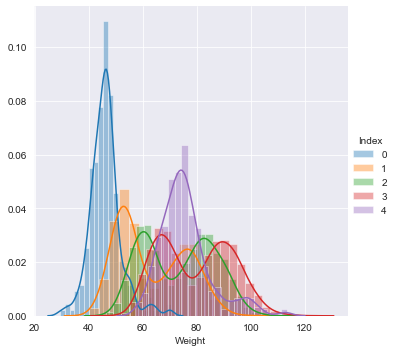

In [14]:
sns.FacetGrid(dummy,hue="Index",height=5).map(sns.distplot,"Weight").add_legend()
plt.show()

### Identify and treat missing values and check dataset outliers

In [15]:
# for missing values
dummy.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

> No missing values

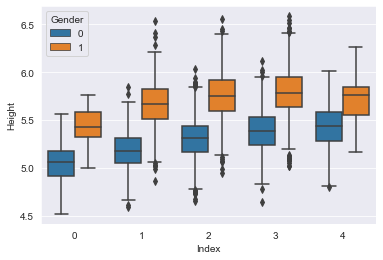

In [16]:
# for outliers
sns.boxplot(x='Index',y='Height',hue='Gender',data=dummy)
plt.show()

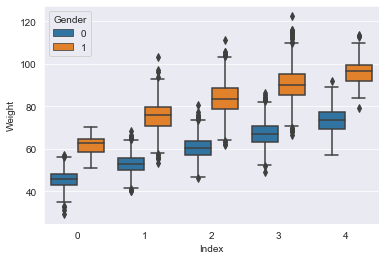

In [17]:
# for outliers
sns.boxplot(x='Index',y='Weight',hue='Gender',data=dummy)
plt.show()

> There are some outliers at every index but this will give more help in classification so don't remove this.

### Build a correlation matrix to identify relevant variables ( Graph )

In [18]:
# correlation matrix
corrMatrix=dummy.corr()
corrMatrix

,Gender,Height,Weight,Index
Gender,1.000000,0.691072,0.796723,0.008550
Height,0.691072,1.000000,0.924756,0.220223
Weight,0.796723,0.924756,1.000000,0.428293
Index,0.008550,0.220223,0.428293,1.000000


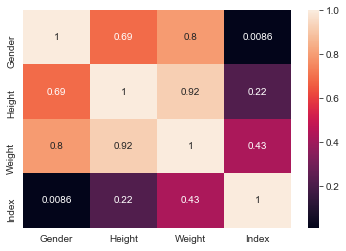

In [19]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

> The above heatmap shows dependency between Height and Weight and the correlation value is 0.92. And we can also see the overall distribution of every attribute with respect to that of another.


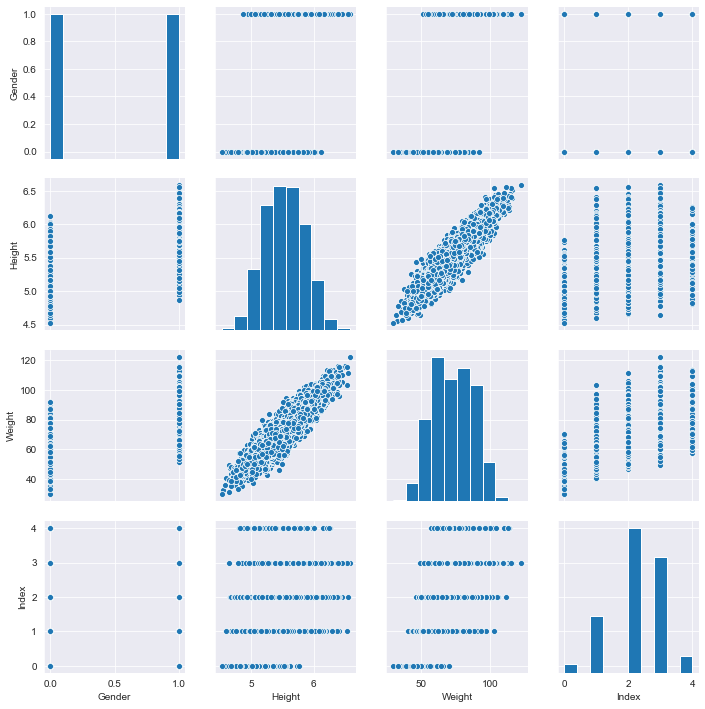

In [20]:
sns.pairplot(dummy)
plt.show()

> Here we have 16 graphs which are described below :

> * Gender is distributed equally, i.e; dataset contain equal instance of data for both male and female.
> * There is equally spread of height on the basis gender.
> * There is equally spread of weight on the basis gender.
> * There is equally spread of index on the basis gender.

> * There is equally data of height for both gender.
> * This is the distribuion of height.
> * This is strongly correlated value for Height and Weight.
> * There is equally data of height for all index (0,1,2,3,4).

> * There is equally data of weight for both gender.
> * This is strongly correlated value for Weight and Height.
> * This is the distribuion of weight.
> * There is equally data of weight for all index (0,1,2,3,4).

> * There is equally data of all indexes for both gender.
> * This is for the distribuion of height over indexes.
> * This is for the distribuion of weight over indexes.
> * There is the  distribuion of all index (0,1,2,3,4).


#### Hence we can conclude that we have two attributes (Height and Weight) strongly correlated with the value 0.92.